###Data preprocessing

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
data_dir = 'Hibiscus Dataset'
categories = ['Healthy_leaf', 'Diseased_leaf']
img_size = 128  # Resize all images to 128x128

data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(class_num)
        except Exception as e:
            print("Error:", e)

# Convert to arrays
X = np.array(data) / 255.0  # normalize
y = to_categorical(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape, y.shape

((480, 128, 128, 3), (480, 2))

builds the CNN model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

mymodel = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: Healthy, Diseased
])

mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mymodel.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [24]:
history = mymodel.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.6238 - loss: 1.2225 - val_accuracy: 0.9167 - val_loss: 0.2424
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.9532 - loss: 0.1612 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9931 - loss: 0.0300 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 6.9509e-04
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 1.0000 - loss: 7.2390e-04 - val_accuracy: 1.0000 - val_loss: 3.5668e-05
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 1.0000 - loss: 2.0869e-04 - val_accuracy: 1.0000 - val_loss: 2.0209e-05
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 1.0000 - loss: 2.3004e-04 - val_accuracy: 1.0000 - val_loss: 1.1643e-05
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 1.0000 - los

In [26]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

history = mymodel.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=15, 
                    validation_data=(X_test, y_test))

Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9901 - loss: 0.0355 - val_accuracy: 1.0000 - val_loss: 3.1945e-04
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9802 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 6.9450e-04
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 4.2041e-05
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 1.0000 - loss: 8.7245e-04 - val_accuracy: 1.0000 - val_loss: 7.7559e-06
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 1.0000 - loss: 8.3087e-04 - val_accuracy: 1.0000 - val_loss: 5.8014e-06
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 1.0000 - loss: 2.3605e-04 - val_accuracy: 1.0000 - val_loss: 1.1822e-06
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 1.0000 - loss: 7.8007e-05 - val_accuracy: 1.0000 - val_loss: 4.4455e-07
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 1.0000 

evaluate the model

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
               precision    recall  f1-score   support

 Healthy_leaf       1.00      1.00      1.00        47
Diseased_leaf       1.00      1.00      1.00        49

     accuracy                           1.00        96
    macro avg       1.00      1.00      1.00        96
 weighted avg       1.00      1.00      1.00        96



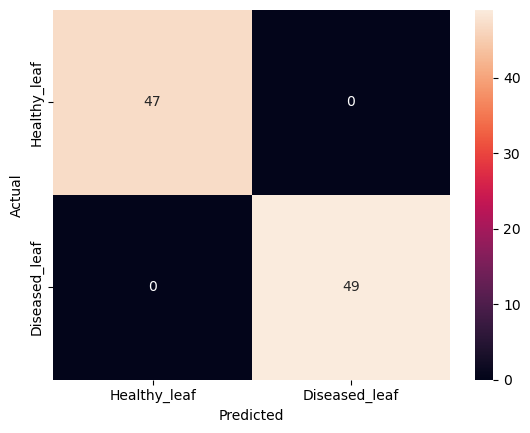

In [28]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = mymodel.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=categories))

In [57]:
mymodel.save('model/hibiscus_leaf_classifier.h5')

In [38]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import numpy as np


In [51]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []

X = np.array(X)  # Already normalized (0-1)
y_int = np.argmax(y, axis=1)  # Convert one-hot back to int for skf.split

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y_int)):
    print(f"\n📂 Fold {fold + 1}/{k}")
    
    # Split data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Define model
    mymodel = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    
    mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train model
    mymodel.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Evaluate
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)
    
    acc = accuracy_score(y_true_classes, y_pred_classes)
    print(f"✅ Accuracy: {acc:.4f}")
    accuracies.append(acc)

print(f"\n🎯 Average Accuracy over {k} folds: {np.mean(accuracies):.4f}")


📂 Fold 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ Accuracy: 1.0000

📂 Fold 2/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ Accuracy: 1.0000

📂 Fold 3/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
✅ Accuracy: 1.0000

📂 Fold 4/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ Accuracy: 1.0000

📂 Fold 5/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ Accuracy: 1.0000

🎯 Average Accuracy over 5 folds: 1.0000


mobile integration 

In [59]:
import tensorflow as tf

# Load model
model = tf.keras.models.load_model('model/hibiscus_leaf_classifier.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model/hibiscus_leaf_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmpn5qcr5di/assets


INFO:tensorflow:Assets written to: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmpn5qcr5di/assets


Saved artifact at '/var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmpn5qcr5di'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_11')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  13334098000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13334100304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13334100112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13334101072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13334100880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13334101648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13334100688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13334100496: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1743882452.449004 3859398 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1743882452.449870 3859398 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-06 01:17:32.451010: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmpn5qcr5di
2025-04-06 01:17:32.451440: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-06 01:17:32.451445: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmpn5qcr5di
2025-04-06 01:17:32.456375: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-06 01:17:32.531931: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmpn5qcr5di
2025-04-06 01:17:32.537804: I tensorflow/cc/saved_model/loader.cc:

In [61]:
import tensorflow as tf

# Load the .h5 model
model = tf.keras.models.load_model('model/hibiscus_leaf_classifier.h5')

# Create a converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Optional: Apply optimizations for mobile
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the .tflite file
with open('hibiscus_leaf_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ TFLite model saved successfully!")

INFO:tensorflow:Assets written to: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmp447_vk91/assets


INFO:tensorflow:Assets written to: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmp447_vk91/assets


Saved artifact at '/var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmp447_vk91'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_11')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  13435916688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13435918800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13435922256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13435920912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13435921104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13435920144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13435921296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13435919760: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ TFLite model saved successfully!


W0000 00:00:1743882476.628789 3859398 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1743882476.628814 3859398 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-06 01:17:56.628944: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmp447_vk91
2025-04-06 01:17:56.629329: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-06 01:17:56.629334: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmp447_vk91
2025-04-06 01:17:56.632200: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-06 01:17:56.676505: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/pt/hhq91p6n4sd5ppffbbjhm2s40000gn/T/tmp447_vk91
2025-04-06 01:17:56.681612: I tensorflow/cc/saved_model/loader.cc:

In [69]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="/Users/alliotahmed/Documents/Project-mini(college)/assets/hibiscus_leaf_classifier.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load labels
with open("/Users/alliotahmed/Documents/Project-mini(college)/assets/label.txt", "r") as f:
    labels = [line.strip() for line in f.readlines()]

def classify_image(image):
    image = image.resize((128, 128))  # Resize to model input
    img_array = np.expand_dims(np.array(image).astype(np.float32) / 255.0, axis=0)

    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()

    predictions = interpreter.get_tensor(output_details[0]['index'])[0]
    top_class = np.argmax(predictions)
    confidence = predictions[top_class]

    return labels[top_class], confidence

# Streamlit UI
st.title("🌿 Hibiscus Leaf Disease Classifier")
st.write("Upload a photo of a leaf to check if it's healthy or diseased.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Leaf Image", use_column_width=True)

    with st.spinner("Classifying..."):
        label, confidence = classify_image(image)
    
    st.success(f"Prediction: **{label}** ({confidence * 100:.2f}% confidence)")

In [ ]:
stream lit